# <h2 align=center> PROYECTO INDIVIDUAL Nº1 </h2>
# <h1 align=center>Recomendacion de Películas</h1>
        @autor: Lesmen Gerardo García Pernia

## Objetivos:

+ Crear un Modelo de Sistema de Recomendacion utilizando las caracteristicas de las películas para encontrar peliculas similares a las que ha visto un determinado usuario y le han gustado.

Estaremos utilizando un Sistema de Recomendacion Basado en el Analisis de Contenido <Br>
El objetivo de este tipo de modelo es analizar y seleccionar desde una gran Base de Datos, productos que sean similares a las caracteristicas de preferencia de un usuario. *"Seleccionar productos similares a aquellos que te gustan"*

Información adicioal:

https://www.futurespace.es/sistemas-de-recomendacion-de-contenidos-adivina-que-piensan-tus-clientes/

https://learn.microsoft.com/es-es/azure/architecture/solution-ideas/articles/build-content-based-recommendation-system-using-recommender


Definición de librerias

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import ast
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

Fuente de datos

+ [Dataset](https://drive.google.com/drive/folders/1mfUVyP3jS-UMdKHERknkQ4gaCRCO2e1v): <Br>
Dos (2) Archivos de datos: movies_dataset.csv y credits.csv
+ [Diccionario de datos](https://docs.google.com/spreadsheets/d/1QkHH5er-74Bpk122tJxy_0D49pJMIwKLurByOfmxzho/edit#gid=0): <br/>
Diccionario con algunas descripciones de las columnas disponibles en el dataset.


# 1) Extracción Transformación y Carga (ETL)

Dataset Originales de datos: movies_dataset.csv y credits.csv

In [6]:
### Datasets Originales de Datos. 
df_movies = pd.read_csv('../DataSetsPI/movies_dataset.csv')      # Pesa  34 MB
df_credits = pd.read_csv('../DataSetsPI/credits.csv')            # Pesa 186 MB


C:\Users\lesme\AppData\Local\Temp\ipykernel_20824\1988553726.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv('../DataSetsPI/movies_dataset.csv')      # Pesa  34 MB


Datasets Optimizados para las Consultas desde Render

In [7]:
### Datasets resultantes de del ETL y EDA. Requeridos para realizar las pruebas en FastAPi y Render.
#df_Funcion_5_render = pd.read_csv('DataSets/df_Funcion_5.csv')
#df_Funcion_6_render = pd.read_csv('DadatesClean/df_Funcion_6.csv')
#df_movies_render = pd.read_csv('DadatesClean/df_movies.csv', sep=';')

## 1.1) Revision inicial de los datos de "df_movies"

### 1.1.1) Requerimientos Iniciales del Proyecto:

In [8]:
### Visualizar el dataSets de movies:
df_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [9]:
### Visualizar los tipos de datos de las columnas y cantidad total:
print("Tipos de Datos de cada Columna del Dataset: 'df_movies' ")
print("="*54)
df_movies.info()

Tipos de Datos de cada Columna del Dataset: 'df_movies' 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 1

In [10]:
### Visualizar los datos númericos:
print("Visualizando Estadisticos Principales de los datos númericos del Dataset: 'df_movies' ")
print("="*84)
df_movies.describe()

Visualizando Estadisticos Principales de los datos númericos del Dataset: 'df_movies' 


,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [11]:
### Valores nulos en cada columna de "df_movies"
print("Valores Nulos del Dataset: 'df_movies' ")
print("="*37)
df_movies.isna().sum()

Valores Nulos del Dataset: 'df_movies' 


adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [12]:
### Total de valores nulos en "df_movies"
print("Total de valores nulos en 'df_movies'= ", df_movies.isna().sum().sum())

Total de valores nulos en 'df_movies'=  105562


### Se procede a realizar los requerimiento iniciales del proyecto.

### 1.1.1.1) Requerimiento del Proyecto, Nro.: 1

+ Algunos campos, como **`belongs_to_collection`**, **`production_companies`** y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder  y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.

In [13]:
df_movies[['belongs_to_collection','production_companies']]

,belongs_to_collection,production_companies
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,NaN,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,NaN,[{'name': 'Twentieth Century Fox Film Corporat...
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'name': 'Sandollar Productions', 'id': 5842}..."
...,...,...
45461,NaN,[]
45462,NaN,"[{'name': 'Sine Olivia', 'id': 19653}]"
45463,NaN,"[{'name': 'American World Pictures', 'id': 6165}]"
45464,NaN,"[{'name': 'Yermoliev', 'id': 88753}]"


In [14]:
### Visualizando el 3er registro del Dataset para visualizar sus datos
df_movies.iloc[2]

adult                                                                False
belongs_to_collection    {'id': 119050, 'name': 'Grumpy Old Men Collect...
budget                                                                   0
genres                   [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
homepage                                                               NaN
id                                                                   15602
imdb_id                                                          tt0113228
original_language                                                       en
original_title                                            Grumpier Old Men
overview                 A family wedding reignites the ancient feud be...
popularity                                                         11.7129
poster_path                               /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
production_companies     [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
production_countries     

Efectivamen el datasets de 'df_movies' tiene varias columnas anidadas. <Br>Se procede a su visualizacion en detalle

### A) Visualización de las Columnas Anidadas del Datasets 'df_movies'

1) Visualizando la columna: *`belongs_to_collection`*

In [15]:
### Visualizando la cadena en forma de diccionario de la columna "belongs_to_collection", de un determinado registro. 

fila_indice = 4  # Indice del registro o fila que se quiere visualizar.
Columna = 'belongs_to_collection'
CadenaDeDiccionario = df_movies.at[fila_indice, Columna]

print("1) Visualizando los datos horizontalmente:\n", "="*41)
print(CadenaDeDiccionario,"\n")

print("2) Visualizando los datos verticalmente:\n", "="*39)

### Convertir la cadena de caracteres en un diccionario usando eval()
DiccionarioDeDatos = eval(CadenaDeDiccionario)

### Ciclo for par avisualizar por clave valor, emulando un diccionario a partir de una cadena de caracteres
for key, value in DiccionarioDeDatos.items():
    print(f"{key}: {value}")
 
print("="*100)    
print(f"La columna '{Columna}', se refiere a la franquicia que realizó la película")
print("="*100)     


1) Visualizando los datos horizontalmente:
{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg', 'backdrop_path': '/7qwE57OVZmMJChBpLEbJEmzUydk.jpg'} 

2) Visualizando los datos verticalmente:
id: 96871
name: Father of the Bride Collection
poster_path: /nts4iOmNnq7GNicycMJ9pSAn204.jpg
backdrop_path: /7qwE57OVZmMJChBpLEbJEmzUydk.jpg
La columna 'belongs_to_collection', se refiere a la franquicia que realizó la película


De la columna "belongs_to_collection" nos interesa extraer el nombre de la Franquicia. Osea extraer la clave: name y su respectivo valor.

2) Visualizando la columna: *`genres`*

In [16]:
### Visualizando la lista de diccionario de la columna "genres" de un determinado registro. 

fila_indice = 3  # Indice del registro a visualizar.
Columna = 'genres'

CadenaDeDiccionario = df_movies.at[fila_indice, Columna]

print("1) Visualizando los datos horizontalmente:\n", "="*41)
print(CadenaDeDiccionario,"\n")

print("2) Visualizando los datos verticalmente:\n", "="*39)

lista_str = df_movies.at[fila_indice, Columna]   # Toma la cedana de caracteres en forma de lista de diccionarios
lista = ast.literal_eval(lista_str)             # Convierte la cadena en dormato de lista.
N = len(lista)                                 # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:                 # For para imprimir todos los diccionarios de la lista.
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("--------------------")
    
print("="*100)    
print(f"La columna '{Columna}', se refiere a la franquicia que realizó la película. (Dato relevante en el proyecto)")
print("="*100)

1) Visualizando los datos horizontalmente:
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}] 

2) Visualizando los datos verticalmente:
id: 35
name: Comedy
--------------------
id: 18
name: Drama
--------------------
id: 10749
name: Romance
--------------------
La columna 'genres', se refiere a la franquicia que realizó la película. (Dato relevante en el proyecto)


De la columna "genres", nos interesa extraer todos los Generos de la Película. En esta caso la película podria tener varios generos. Por lo tanto debemos extraer todos sus claves valor de: name.

3) Visualizando la columna: *`production_companies`*

In [17]:
### Visualizando la lista de diccionario de la columna "production_companies" de un determinado registro. 

fila_indice = 5  # Indice del registro o fila que se quiere visualizar.
Columna = 'production_companies'

CadenaDeDiccionario = df_movies.at[fila_indice, Columna]

print("1) Visualizando los datos horizontalmente:\n", "="*41)
print(CadenaDeDiccionario,"\n")

print("2) Visualizando los datos verticalmente:\n", "="*39)

lista_str = df_movies.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("--------------------")
    
print("="*100)    
print(f"La columna '{Columna}', se refiere a la franquicia que realizó la película")
print("="*100)

1) Visualizando los datos horizontalmente:
[{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}] 

2) Visualizando los datos verticalmente:
name: Regency Enterprises
id: 508
--------------------
name: Forward Pass
id: 675
--------------------
name: Warner Bros.
id: 6194
--------------------
La columna 'production_companies', se refiere a la franquicia que realizó la película


De la columna "production_companies" nos interesa extraer todos las Compañias de Produccion de la Película. En esta caso la película podria tener varias compañias de producción. Por lo tanto debemos extraer todos sus claves valor de: name.

4) Visualizando la columna: *`production_countries`*

In [18]:
### Visualizando la lista de diccionario de la columna "production_countries" de un determinado registro. 

fila_indice = 3500  # Indice del registro o fila que se quiere visualizar.
Columna = 'production_countries'

CadenaDeDiccionario = df_movies.at[fila_indice, Columna]

print("1) Visualizando los datos horizontalmente:\n", "="*41)
print(CadenaDeDiccionario,"\n")

print("2) Visualizando los datos verticalmente:\n", "="*39)

lista_str = df_movies.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("--------------------")
    
print("="*100)    
print(f"La columna '{Columna}', se refiere a la franquicia que realizó la película")
print("="*100)

1) Visualizando los datos horizontalmente:
[{'iso_3166_1': 'US', 'name': 'United States of America'}] 

2) Visualizando los datos verticalmente:
iso_3166_1: US
name: United States of America
--------------------
La columna 'production_countries', se refiere a la franquicia que realizó la película


De la columna "production_countries" nos interesa extraer todos las Paises de Produccion de la Película. En esta caso la película podria tener varias paises de producción. Por lo tanto debemos extraer todos sus claves valor de: name.

5) Visualizando la columna: *`spoken_languages`*

In [19]:
### Visualizando la lista de diccionario de la columna "genres" de un determinado registro. 
fila_indice = 2  # Indice del registro o fila que se quiere visualizar.
Columna = 'spoken_languages'

CadenaDeDiccionario = df_movies.at[fila_indice, Columna]

print("1) Visualizando los datos horizontalmente:\n", "="*41)
print(CadenaDeDiccionario,"\n")

print("2) Visualizando los datos verticalmente:\n", "="*39)

lista_str = df_movies.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("--------------------")
    
print("="*100)    
print(f"La columna '{Columna}', se refiere a la franquicia que realizó la película")
print("="*100)

1) Visualizando los datos horizontalmente:
[{'iso_639_1': 'en', 'name': 'English'}] 

2) Visualizando los datos verticalmente:
iso_639_1: en
name: English
--------------------
La columna 'spoken_languages', se refiere a la franquicia que realizó la película


De la columna "spoken_languages" nos interesa extraer todos los Idiomas que se hablan en la película. <Br>En esta caso en la película podrian hablarse varios idiomas. Por lo tanto debemos extraer todos sus claves valor de: name.

In [20]:
### Visualizando todas las columnas anidadas de un determinado registro o fila.
for i in (1,3,12,13,17):
    print(df_movies.iloc[2][i])

{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_639_1': 'en', 'name': 'English'}]


### B) Funciones para Desanidar las Columnas Anidadas del Datasets 'df_movies'

Se procede a desanidar o separar el valor de la clave-valor: en las siguientes columnas:

<ul>
<li> 1) belongs_to_collection (Diccionario).</li>
<li> 2) genres (Lista de Diccionario). </li>
<li> 3) production_companies (Lista de Diccionario).</li>
<li> 4) production_countries (Lista de Diccionario).</li>
<li> 5) spoken_languages (Lista de Diccionario).</li>
</ul>

Se procede a crear dos Funciones para Desanidar estas 5 columnas anidadas. La primera función ***(`Extraer_Valor_Dicc`)***, para extraer de la columna 'belongs_to_collection' sus campos en forma de diccionarios. Y la segunda función ***(`Extraer_Valor_List`)***, para extraer del resto de las columnas que contienen sus campos como una lista de diccionarios.

1 ) Funcion: `Extraer_Valor_Dicc`:<Br>
*Funcion para evaluar la columnas string pero en forma de diccionarios y extraer el valor asociado a la claves claves- valor

In [21]:
# Función para extraer el valor de la clave 'name', de la columna diccionario: 
def Extraer_Valor_Dicc(value):
    try:
        diccionario = ast.literal_eval(value)  #Evaluamos cada atributo como un diccionario de Python
        if isinstance(diccionario, dict): #Si el valor es un diccionario, extrae el valor asociado a la clave 'name', para luego retornarlo
            return diccionario.get('name', '')
    except (ValueError, SyntaxError): #Si no es posible evaluarlo como un diccionario, capturamos las excepciones (ValueError o SyntaxError) y devolvemos una cadena vacía.
        pass
    return ''  # En caso de no ser un diccionario, se devuelve una cadena vacía.

2  ) Funcion: `Extraer_Valor_Lista`:<Br>
*Funcion para evaluar la columnas string pero en forma de listas de diccionarios y extraer el valor asociado a la claves claves- valor

In [22]:
# Función para extraer el valor de la clave 'name', de la columna lista de diccionarios: genres
def Extraer_Valor_List(value):
    try:
        lista_de_diccionarios = ast.literal_eval(value) ##Evaluamos cada atributo como una lista de diccionario de Python
        if isinstance(lista_de_diccionarios, list): #Si el valor es una lista de diccionario, extrae el valor asociado a la 
                                                    #clave 'name' de cada diccionario y lo concatena en una sola cadena.
            names = [dic.get('name', '') for dic in lista_de_diccionarios if isinstance(dic, dict)]
            return ','.join(names)
    except (ValueError, SyntaxError):
        pass
    return ''  # Si no es posible evaluarlo como una lista de diccionarios, se devuelve una cadena vacía

### C) Desanidando las Funcióes Anidadas del Datasets 'df_movies'

1) Desanidando la Columna **`'belongs_to_collection'`**, por el atributo {name} que representa el nombre de la Franquicia.

In [23]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Franquicia'

Columna = 'belongs_to_collection'   # Columna a Desanidar
NuevaColumna = 'Franquicia'         # Nueva Columna

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_Dicc)

### Eliminando la columna: belongs_to_collection
###df_movies.drop(columns=[Columna], inplace=True)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna belongs_to_collection, antes de desanidar= 40972
Cantidad de Valores Nulos de la Columna Franquicia, despúes de desanidar: 0


0                  Toy Story Collection
1                                      
2             Grumpy Old Men Collection
3                                      
4        Father of the Bride Collection
                      ...              
45461                                  
45462                                  
45463                                  
45464                                  
45465                                  
Name: Franquicia, Length: 45466, dtype: object

In [24]:
df_movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
Franquicia                   0
dtype: int64

Se puede observar que hay muchos valores NaN

2) Desanidando la Columna **`'genres'`**, por el atributo {name} que representa el nombre los Generos de la Películas.

In [25]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Generos'

Columna = 'genres'   # Columna a Desanidar
NuevaColumna = 'Generos'         # Nueva Columna

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_List)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Eliminando la columna: genres
### df_movies.drop(columns=[Columna], inplace=True)

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna genres, antes de desanidar= 0
Cantidad de Valores Nulos de la Columna Generos, despúes de desanidar: 0


0         Animation,Comedy,Family
1        Adventure,Fantasy,Family
2                  Romance,Comedy
3            Comedy,Drama,Romance
4                          Comedy
                   ...           
45461                Drama,Family
45462                       Drama
45463       Action,Drama,Thriller
45464                            
45465                            
Name: Generos, Length: 45466, dtype: object

Los Generos quedan divididos por comas. También se observa valores en blanco.

3) Desanidando la Columna **`'production_companies'`**, por el atributo {name} que representa el nombre de las Compañias Productoras de Películas.

In [26]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Productores'

Columna = 'production_companies'     # Columna a Desanidar
NuevaColumna = 'Productores'         # Nueva Columna

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_List)

### Eliminando la columna: genres
### df_movies.drop(columns=[Columna], inplace=True)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna production_companies, antes de desanidar= 3
Cantidad de Valores Nulos de la Columna Productores, despúes de desanidar: 0


0                                  Pixar Animation Studios
1        TriStar Pictures,Teitler Film,Interscope Commu...
2                              Warner Bros.,Lancaster Gate
3                   Twentieth Century Fox Film Corporation
4                Sandollar Productions,Touchstone Pictures
                               ...                        
45461                                                     
45462                                          Sine Olivia
45463                              American World Pictures
45464                                            Yermoliev
45465                                                     
Name: Productores, Length: 45466, dtype: object

Las compañias quedan separadas por comas. También se observan registros en blanco.

4) Desanidando la Columna **`'production_countries'`**, por el atributo {name} que representa el nombre del País de Producción de la Película.

In [27]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Paises'

Columna = 'production_countries'     # Columna a Desanidar
NuevaColumna = 'Paises'              # Nueva Columna

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_List)

### Eliminando la columna: genres
### df_movies.drop(columns=[Columna], inplace=True)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna production_countries, antes de desanidar= 3
Cantidad de Valores Nulos de la Columna Paises, despúes de desanidar: 0


0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45461                        Iran
45462                 Philippines
45463    United States of America
45464                      Russia
45465              United Kingdom
Name: Paises, Length: 45466, dtype: object

5) Desanidando la Columna **`'spoken_languages'`**, por el atributo {name} que representa el nombre de los Idiomas que se hablan en la Película.

In [28]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'IdiomasH'

Columna = 'spoken_languages'           # Columna a Desanidar
NuevaColumna = 'IdiomasH'              # Nueva Columna (Idiomas Hablados en la Película)

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_List)

### Eliminando la columna: genres
### df_movies.drop(columns=[Columna], inplace=True)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna spoken_languages, antes de desanidar= 6
Cantidad de Valores Nulos de la Columna IdiomasH, despúes de desanidar: 0


0                 English
1        English,Français
2                 English
3                 English
4                 English
               ...       
45461               فارسی
45462                    
45463             English
45464                    
45465             English
Name: IdiomasH, Length: 45466, dtype: object

In [29]:
### Información de Columnas y Filas del DataSets
print("Columnas del DataSets de Movies:\n\n",df_movies.columns,"\n")
print("Dimensiones del DataSets de Movies: ",df_movies.shape,"\n")

Columnas del DataSets de Movies:

 Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Franquicia', 'Generos', 'Productores',
       'Paises', 'IdiomasH'],
      dtype='object') 

Dimensiones del DataSets de Movies:  (45466, 29) 



In [30]:
df_movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
Franquicia                   0
Generos                      0
Productores                  0
Paises                       0
IdiomasH                     0
dtype: int64

### 1.1.1.2) Requerimiento del Proyecto, Nro. 2

+ Los valores nulos de los campos **`revenue`**, **`budget`** deben ser rellenados por el número **`0`**.

In [31]:
print("Cantidad de Valores Nulos de 'revenue':",df_movies['revenue'].isna().sum())
print("Cantidad de Valores Nulos de 'budget':",df_movies['budget'].isna().sum())

Cantidad de Valores Nulos de 'revenue': 6
Cantidad de Valores Nulos de 'budget': 0


In [32]:
# Se procede a sustituir los 6 valores nulos en la columna "revenue" y "budget", con cero (0).
df_movies['revenue'] = df_movies['revenue'].fillna(0)
df_movies['budget'] = df_movies['budget'].fillna(0)

# Otra forma de hacerlo: 
# df_movies2['revenue'].fillna(0,inplace=True)

# Validamos que ya no existan valores nulos:
print("Cantidad de Valores Nulos de 'revenue':",df_movies['revenue'].isna().sum())
print("Cantidad de Valores Nulos de 'budget':",df_movies['budget'].isna().sum())

Cantidad de Valores Nulos de 'revenue': 0
Cantidad de Valores Nulos de 'budget': 0


In [33]:
### La columna 'budget' esta definida como Objeto, pero es Númerico.
### Convertiendo la columna de tipo objeto a tipo numerico, y los que no sean numericos los convierte en NaN:

df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')

### Validano los cambios realizados a númerico y luego si se ha creado algun NaN:
print("Cantidad de Valores Nulos de 'budget':",df_movies['budget'].isna().sum())

Cantidad de Valores Nulos de 'budget': 3


In [34]:
# Se procede a sustituir los 3 valores nuevos por ceros
df_movies['budget'] = df_movies['budget'].fillna(0)

### Validano los cambios realizados a númerico y luego si se ha creado algun NaN:
print("Cantidad de Valores Nulos de 'budget':",df_movies['budget'].isna().sum())

Cantidad de Valores Nulos de 'budget': 0


### 1.1.1.3) Requerimiento del Proyecto, Nro. 3

+ Los valores nulos del campo **`release_date`** deben eliminarse.

In [35]:
print("Total de Valores Nulos de la columna 'release_date'= ",df_movies['release_date'].isna().sum())

Total de Valores Nulos de la columna 'release_date'=  87


Eliminando Valores Nulos en la Columna 'release_date'

In [36]:
df_movies.dropna(subset=['release_date'], inplace=True)
print("Total de Valores Nulos de la columna 'release_date'= ",df_movies['release_date'].isna().sum())

Total de Valores Nulos de la columna 'release_date'=  0


### 1.1.1.4) Requerimiento del Proyecto, Nro. 4

+ De haber fechas, deberán tener el formato **`AAAA-mm-dd`**, además deberán crear la columna **`release_year`** donde extraerán el año de la fecha de estreno.

In [37]:
### Validan el tipo de columna 'release_date' y sus datos
print(df_movies['release_date'])
df_movies['release_date'].info()


0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45460    1991-05-13
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45379, dtype: object
<class 'pandas.core.series.Series'>
Index: 45379 entries, 0 to 45465
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
45379 non-null  object
dtypes: object(1)
memory usage: 709.0+ KB


Se puede observar que la columna 'release_date' es una fecha y esta definido como tipo objeto

Validamos si hay valores nulos

In [38]:
### Validamos si tiene NaN:
print("Cantidad de Valores Nulos de 'release_date':",df_movies['release_date'].isna().sum())

Cantidad de Valores Nulos de 'release_date': 0


Convertimos a formato fecha

In [39]:
### Primero convertimos a datetime la columna 'release_date'
### Y forzamos a convertir en NaN a todos los valores que den error (errors='coerce).

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')

### Validamos nuevamente la cantidad de valores NaN
print("Cantidad de Valores Nulos de 'release_date':",df_movies['release_date'].isna().sum())

Cantidad de Valores Nulos de 'release_date': 3


In [40]:
### Validando que se realizó el cambio
df_movies['release_date'].info()

<class 'pandas.core.series.Series'>
Index: 45379 entries, 0 to 45465
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
45376 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 709.0 KB


In [41]:
### Validamos si tiene NaN:
print("Cantidad de Valores Nulos de 'release_date':",df_movies['release_date'].isna().sum())

Cantidad de Valores Nulos de 'release_date': 3


Se procede a eliminar los 3 nuevos valores nulos que aparecieron después de convertirlos a formato fecha.

In [42]:
df_movies.dropna(subset=['release_date'], inplace=True)
print("Total de Valores Nulos de la columna 'release_date'= ",df_movies['release_date'].isna().sum())

Total de Valores Nulos de la columna 'release_date'=  0


Se crea la nueva columna del añio

In [43]:
### Como efectivamente todos los registros de la columna 'release_date' tienen el mismo formato, 
### pasamos a crear la columna de años:

#Creamos la columna 'release_year' que va a contener el año de la columna 'release_date'
df_movies['Anio'] = pd.to_datetime(df_movies['release_date']).dt.year

### Validamos la nueva columna de 'release_year'
print(df_movies[['release_date','Anio']].head(5))
df_movies[['release_date','Anio']].tail(5)

  release_date  Anio
0   1995-10-30  1995
1   1995-12-15  1995
2   1995-12-22  1995
3   1995-12-22  1995
4   1995-02-10  1995


,release_date,Anio
45460,1991-05-13,1991
45462,2011-11-17,2011
45463,2003-08-01,2003
45464,1917-10-21,1917
45465,2017-06-09,2017


In [44]:
### Visualizando Valores Nulos
df_movies.isna().sum()

adult                        0
belongs_to_collection    40888
budget                       0
genres                       0
homepage                 37610
id                           0
imdb_id                     14
original_language           11
original_title               0
overview                   941
popularity                   0
poster_path                339
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
video                        0
vote_average                 0
vote_count                   0
Franquicia                   0
Generos                      0
Productores                  0
Paises                       0
IdiomasH                     0
Anio                         0
dtype: int64

### 1.1.1.5) Requerimiento del Proyecto, Nro. 5

+ Crear la columna con el retorno de inversión, llamada **`return`** con los campos **`revenue`** y **`budget`**, dividiendo estas dos últimas **`revenue / budget`**, cuando no hay datos disponibles para calcularlo, deberá tomar el valor **`0`**.

In [45]:
### Validando que no hay NaN, en ninguna de las dos columnas:
print(df_movies['budget'].isna().sum())
df_movies['revenue'].isna().sum()

0


0

In [46]:
### Validando datos
df_movies[['budget','revenue']].describe()

,budget,revenue
count,4.537600e+04,4.537600e+04
mean,4.232604e+06,1.123010e+07
std,1.743986e+07,6.438996e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.800000e+08,2.787965e+09


Se puede observar que ambas columnas tienen valores en ceros (0)

In [47]:
### Se realiza esta conversion para detectar la existencia de algun dato, con un posible error. (Por si acaso !!!!)
df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')
df_movies['revenue'] = pd.to_numeric(df_movies['revenue'], errors='coerce')

Se valida nuevamente si aparecieron valores nulos.

In [48]:
### Validando que no hay NaN, en ninguna de las dos columnas:
print(df_movies['budget'].isna().sum())
df_movies['revenue'].isna().sum()

0


0

In [49]:
### Creando la columna con la formula del retorno de inversión 'return'
df_movies['return'] = df_movies.apply(lambda x_return: 0 if x_return['budget'] == 0 else (x_return['revenue'] / x_return['budget']), axis=1)

### Visualizando las columnas
print(df_movies[['revenue', 'budget','return']].head(10))
df_movies[['revenue', 'budget','return']].tail(10)

       revenue      budget     return
0  373554033.0  30000000.0  12.451801
1  262797249.0  65000000.0   4.043035
2          0.0         0.0   0.000000
3   81452156.0  16000000.0   5.090760
4   76578911.0         0.0   0.000000
5  187436818.0  60000000.0   3.123947
6          0.0  58000000.0   0.000000
7          0.0         0.0   0.000000
8   64350171.0  35000000.0   1.838576
9  352194034.0  58000000.0   6.072311


,revenue,budget,return
45455,0.0,0.0,0.0
45456,0.0,0.0,0.0
45457,0.0,0.0,0.0
45458,0.0,0.0,0.0
45459,0.0,0.0,0.0
45460,0.0,0.0,0.0
45462,0.0,0.0,0.0
45463,0.0,0.0,0.0
45464,0.0,0.0,0.0
45465,0.0,0.0,0.0


### 1.1.1.6) Requerimiento del Proyecto, Nro. 6

+ Eliminar las siguientes 6 columnas que no serán utilizadas, **`video`**,**`imdb_id`**,**`adult`**,**`original_title`**,**`poster_path`** y **`homepage`**.

In [50]:
### Total de Columnas
print("Total de Columnas=",df_movies.columns.value_counts().sum())

### Cantidad de columnas a eliminar por el Requeriiento Nro.6
print("Nro de Columnas a eliminar el el Requerimienti Nro.6 = 6 ")

### Se procede a eliminar las 6 columnas que no serán utilizadas:
df_movies.drop(columns=['video', 'imdb_id','adult', 'original_title', 'poster_path', 'homepage'], inplace=True)

### Columnas Restantes:
print("Columnas Restantes =",df_movies.columns.value_counts().sum())

Total de Columnas= 31
Nro de Columnas a eliminar el el Requerimienti Nro.6 = 6 
Columnas Restantes = 25


In [51]:
### Información de Columnas y Filas del DataSets
print("Columnas del DataSets de Movies:\n\n",df_movies.columns,"\n")
print("Dimensiones del DataSets de Movies: ",df_movies.shape,"\n")

Columnas del DataSets de Movies:

 Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Franquicia', 'Generos', 'Productores', 'Paises',
       'IdiomasH', 'Anio', 'return'],
      dtype='object') 

Dimensiones del DataSets de Movies:  (45376, 25) 



In [52]:
### Validando Tipos de Columnas
print(df_movies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4488 non-null   object        
 1   budget                 45376 non-null  float64       
 2   genres                 45376 non-null  object        
 3   id                     45376 non-null  object        
 4   original_language      45365 non-null  object        
 5   overview               44435 non-null  object        
 6   popularity             45376 non-null  object        
 7   production_companies   45376 non-null  object        
 8   production_countries   45376 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45376 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  status

In [53]:
### Visualizando Valores Nulos
df_movies.isna().sum()

belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
vote_average                 0
vote_count                   0
Franquicia                   0
Generos                      0
Productores                  0
Paises                       0
IdiomasH                     0
Anio                         0
return                       0
dtype: int64

### Fin de Requerimientos iniciales del Proyecto

### 

## 1.2) Revision inicial de los datos de "df_credits"

In [54]:
### Información de Columnas y Filas del DataSets
print("Columnas del DataSets de Movies:\n\n",df_credits.columns,"\n")
print("Dimensiones del DataSets de Movies: ",df_credits.shape,"\n")

Columnas del DataSets de Movies:

 Index(['cast', 'crew', 'id'], dtype='object') 

Dimensiones del DataSets de Movies:  (45476, 3) 



In [55]:
### Visualizando los datos
df_credits.head(2)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


### En el  dataset "df_credits" se requiere desanidar sus dos columnas y <Br>filtrar por los atributos relevantes para el proyecto.

### 1.2.1) Visualizando la primera columna: ***`cast`***

### Columna de Reparto de la Pelicula (cast)

Esta columna cast describe información sobre el reparto de una película. <Br>
Cada registro en el DataFrame representa un miembro del reparto de la película y contiene la siguiente información:

+ "cast_id": El ID del reparto al que pertenece el actor o actriz.
+ "character": El personaje que el actor o actriz interpreta en la película.
+ "credit_id": El ID del crédito en la base de datos de la película.
+ "gender": El género del actor o actriz (1 para mujeres, 2 para hombres).
+ "id": El ID del actor o actriz en la base de datos de la película.
+ "name": El nombre del actor o actriz. 
+ "order": El orden en el que aparece el actor o actriz en los créditos de la película.
+ "profile_path": La ruta de acceso al perfil del actor o actriz en la base de datos de la película. <Br>

In [56]:
### Visualizando la lista de diccionario de la columna "cast" de un determinado registro. 
fila_indice = 1  # Indice del registro o fila que se quiere visualizar.
Columna = 'cast'
DataSets = 'df_credits'

Cadena = df_credits.at[fila_indice, Columna]

print("1) Visualizando los datos horizontalmente:\n", "="*41)
print(Cadena,"\n")

print("2) Visualizando los datos verticalmente:\n", "="*39)

lista_str = df_credits.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("-------------------------------------------------------")
    
print("="*86)    
print(f"La columna '{Columna}', se refiere al Equipo de Reparto de la Película (Cast)")
print("="*86)

1) Visualizando los datos horizontalmente:
[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt

Importante detallar en la salida anterior, que el atributo order toma valores naturales positivos incluyendo al cero ( 0,1,2,3); donde el valor 0 (Cero) corresponde al Protagonista, el valor 1 corresponde al Actor Principal o Primer Actor, el valor 2 corresponde al Actor Secundario y asi sucesivamente.

### 1.2.2) Visualizando la primera columna: ***`crew`***

### Columna de Producción de la Pelicula (crew)

La columna "crew" contiene información sobre el equipo de producción de una película. <Br>

Cada registro en el DataFrame contiene la siguiente información:

+   "credit_id": El ID del crédito en la base de datos de la película.
+   "department": El departamento en el que trabaja el miembro del equipo de producción (por ejemplo, dirección, guion, diseño de producción, fotografía, etc.).
+    "gender": El género del miembro del equipo de producción (1 para mujeres, 2 para hombres).
+   "id": El ID del miembro del equipo de producción en la base de datos de la película.
+   "job": El trabajo que realiza el miembro del equipo de producción (por ejemplo, director, guionista, diseñador de producción, director de fotografía, etc.).
+   "name": El nombre del miembro del equipo de producción.
+   "profile_path": La ruta de acceso al perfil del miembro del equipo de producción en la base de datos de la película.

In [57]:
### Visualizando la lista de diccionario de la columna "crew" de un determinado registro. 
fila_indice = 0  # Indice del registro o fila que se quiere visualizar.
Columna = 'crew'

Cadena = df_credits.at[fila_indice, Columna]

print("1) Visualizando los datos horizontalmente:\n", "="*41)
print(Cadena,"\n")

print("2) Visualizando los datos verticalmente:\n", "="*39)

lista_str = df_credits.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("-------------------------------------------------------")
    
print("="*86)    
print(f"La columna '{Columna}', se refiere al Equipo de Producción de la Película (Crew)")
print("="*86)

1) Visualizando los datos horizontalmente:
[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'cred

En este caso solo se va a desanidar por name y job ya que es relevante para el Sistema de Recomendación.

### 1.2.3) Función para Desanidar las Columnas: ***`'cast'`*** y ***`'crew'`***<br>
Nombre de la Función: `Extraer_Valor_List_Credits`

In [58]:
### Se procede desanidadas la columna de 'cast', por las clave valor de: 'character' y 'name'.

claves = ['name']

def Extraer_Valor_List_Credits(cadena, clave):
    try:
        lista_de_diccionarios = ast.literal_eval(cadena)                                               
        if isinstance(lista_de_diccionarios, list):                                      
            lista_encontrada = [str(dic.get(clave, '')) for dic in lista_de_diccionarios if isinstance(dic, dict)]
            return ','.join(lista_encontrada)
    except (ValueError, SyntaxError):
        pass
    return ''  # Si no es posible evaluarlo como una lista de diccionarios, se devuelve una  cadena vacía

### 1.2.3.1) Desanidando la Columna:  ***`cast`***

In [59]:
### Llamado a la función para desanidar la columna: 'cast'

### Desanidando por la clave: {name}, correspondiente a los actores de la películas.
claves = ['name']

for clave in claves:
    df_credits[f'cast_{clave}'] = df_credits['cast'].apply(Extraer_Valor_List_Credits, clave=clave)

df_credits.head(2)

,cast,crew,id,cast_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra..."


In [60]:
### Visualizando la nueva columna 'cast_name', correspondiente a una variable cualitativa ordinal de Actores.
### EL orden es importante.
Columna = 'cast_name'
print("="*86)    
print(f"La columna '{Columna}', correspndiente a una variable cualitativa ordinal de Actores")
print("="*86)
df_credits['cast_name']

La columna 'cast_name', correspndiente a una variable cualitativa ordinal de Actores


0        Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...
1        Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...
2        Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...
3        Whitney Houston,Angela Bassett,Loretta Devine,...
4        Steve Martin,Diane Keaton,Martin Short,Kimberl...
                               ...                        
45471              Leila Hatami,Kourosh Tahami,Elham Korda
45472    Angel Aquino,Perry Dizon,Hazel Orencio,Joel To...
45473    Erika Eleniak,Adam Baldwin,Julie du Page,James...
45474    Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlo...
45475                                                     
Name: cast_name, Length: 45476, dtype: object

Se puede observar que en la nueva columna 'cast_name' se tienen los nombre de los actores ordenados. <Br>El primer nombre corresponde al Protagonista (order = 0), <Br>El siguiente al Primer Actor o Actor Principal (order = 1), <Br>El siguiente al Segundo Actor o Actor Secundario (order = 2), y asi sucesivamente. <Br>Este es un buen ejemplo de una variable donde importa el orden; por lo tanto se denomina Variable Cualitativa Ordinal.

### 1.2.3.2) Desanidando la Columna:  ***`crew`***

In [61]:
### Llamado a la función para desanidar la columna: 'crew'

### Desanidando por la clave: {job} y {name}, correspondiente la Cargo o rol, y Nombre de la persona que desempeña ese cargo.
claves = ['job', 'name']

for clave in claves:
    df_credits[f'crew_{clave}'] = df_credits['crew'].apply(Extraer_Valor_List_Credits, clave=clave)

df_credits.head(2)

,cast,crew,id,cast_name,crew_job,crew_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...","Director,Screenplay,Screenplay,Screenplay,Scre...","John Lasseter,Joss Whedon,Andrew Stanton,Joel ..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...","Executive Producer,Screenplay,Original Music C...","Larry J. Franco,Jonathan Hensleigh,James Horne..."


In [62]:
### Visualizando la nueva columna 'crew_name', correspondiente a una variable cualitativa ordinal por Cargos.
### EL primero corresponde al Director
Columna = 'crew_job'
print("="*86)    
print(f"La columna '{Columna}', correspndiente a una variable cualitativa ordinal de Roles o Cargos")
print("="*86)
df_credits['crew_job']

La columna 'crew_job', correspndiente a una variable cualitativa ordinal de Roles o Cargos


0        Director,Screenplay,Screenplay,Screenplay,Scre...
1        Executive Producer,Screenplay,Original Music C...
2               Director,Characters,Writer,Sound Recordist
3        Director,Screenplay,Producer,Producer,Producer...
4        Original Music Composer,Director of Photograph...
                               ...                        
45471    Director,Producer,Camera Supervisor,Script,Edi...
45472    Director,Writer,Production Design,Music,Editor...
45473    Director,Screenplay,Screenplay,Original Music ...
45474                                    Director,Producer
45475                                             Director
Name: crew_job, Length: 45476, dtype: object

In [63]:
### Visualizando la nueva columna 'crew_name', correspondiente a una variable cualitativa ordinal por Cargos.
### EL primero corresponde al Director
df_credits['crew_name']
print("="*86)    
print(f"La columna '{Columna}', correspndiente a una variable cualitativa ordinal de Nombres por Cargo")
print("="*86)
df_credits['crew_name']

La columna 'crew_job', correspndiente a una variable cualitativa ordinal de Nombres por Cargo


0        John Lasseter,Joss Whedon,Andrew Stanton,Joel ...
1        Larry J. Franco,Jonathan Hensleigh,James Horne...
2        Howard Deutch,Mark Steven Johnson,Mark Steven ...
3        Forest Whitaker,Ronald Bass,Ronald Bass,Ezra S...
4        Alan Silvestri,Elliot Davis,Nancy Meyers,Nancy...
                               ...                        
45471    Hamid Nematollah,Hamid Nematollah,Farshad Moha...
45472    Lav Diaz,Lav Diaz,Dante Perez,Lav Diaz,Lav Dia...
45473    Mark L. Lester,C. Courtney Joyner,Jeffrey Gold...
45474                 Yakov Protazanov,Joseph N. Ermolieff
45475                                        Daisy Asquith
Name: crew_name, Length: 45476, dtype: object

In [64]:
### Validacion de las nuevas columnas
df_credits.columns

Index(['cast', 'crew', 'id', 'cast_name', 'crew_job', 'crew_name'], dtype='object')

In [65]:
### Informacion de las dimensiones de df_credits
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cast       45476 non-null  object
 1   crew       45476 non-null  object
 2   id         45476 non-null  int64 
 3   cast_name  45476 non-null  object
 4   crew_job   45476 non-null  object
 5   crew_name  45476 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


No presenta valores Nulos

## 1.3) Procesamiento de los Datos

+   1.3.1) Valores Faltantes
+   1.3.2) Valores Atípicos
+   1.3.3) Escalado / Normalizado
+   1.3.4) Codificación de Variables
+   1.3.5) Seleccion de atributos
+   1.3.6) Ingeniería de Features

### 1.3.1) Valores Faltantes

In [66]:
### Valores nulos en cada columna de "df_movies"
print("Valores Nulos del Dataset: 'df_movies' ")
print("="*37)
df_movies.isna().sum()

Valores Nulos del Dataset: 'df_movies' 


belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
vote_average                 0
vote_count                   0
Franquicia                   0
Generos                      0
Productores                  0
Paises                       0
IdiomasH                     0
Anio                         0
return                       0
dtype: int64

In [67]:
#df_movies.isna().sum()
### Total de valores nulos en "df_movies"
print("Total de valores nulos en 'df_movies'= ", df_movies.isna().sum().sum())

#df_movies.isna().sum()
### Total de valores nulos en "df_credits"
print("Total de valores nulos en 'df_credits'= ", df_credits.isna().sum().sum())

Total de valores nulos en 'df_movies'=  67144
Total de valores nulos en 'df_credits'=  0


El Datasets de 'df_credits' no refleja valores nulos. 

Revisando Columnas con Valores NaN

1) Columna = 'original_language'

In [68]:
### INformación Detallada de la Columna: 'original_language'
Columna = 'original_language'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %    Atributo: {df_movies[Columna].describe()[2]}")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'original_language'
Total Registros: 45376
Total Valores Nulos: 11
Porcentaje Valores Nulos: 0.024 %
Frecuencia del Valor que mas se repite: 32202     Porcentaje= 70.984 %    Atributo: en


count     45365
unique       89
top          en
freq      32202
Name: original_language, dtype: object

En resumen en la columna 'original_language' tiene el 0,024 % de valores nulos.
En el 79.984 % de los casos, el Idioma predominante es Ingles ('en').<Br>
Por lo tanto se decide imputar los 11 valores nulos con el idioma que tiene la mayor frecuencia = 'en'.

In [69]:
Columna = 'original_language'
DatosImputar = 'en'

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,5)} %")

print("Realizando la Imputación o reemplazo de los valores..........")
df_movies[Columna].fillna(DatosImputar, inplace=True)

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,5)} %")

Total Valores Nulos: 11    Porcentaje= 0.02424 %
Realizando la Imputación o reemplazo de los valores..........
Total Valores Nulos: 0    Porcentaje= 0.0 %


2) Columna = 'overview'

In [70]:
### INformación Detallada de la Columna: 'overview'
Columna = 'overview'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %    Atributo: {df_movies[Columna].describe()[2]}")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'overview'
Total Registros: 45376
Total Valores Nulos: 941
Porcentaje Valores Nulos: 2.074 %
Frecuencia del Valor que mas se repite: 133     Porcentaje= 0.299 %    Atributo: No overview found.


count                  44435
unique                 44232
top       No overview found.
freq                     133
Name: overview, dtype: object

La información de la columna 'overview' es relevante ya que nos ofrece una caracteristica general de la película. No tener este atributo impacta en la recomendación de la película, en el caso de utilizar esta columna para la dicha recomendación. En resumen, en este momento no es oprtuno eliminar estos valores NaN.   

3) Columna = 'runtime'

In [71]:
### Información Detallada de la Columna: 'runtime'
Columna = 'runtime'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'runtime'
Total Registros: 45376
Total Valores Nulos: 246
Porcentaje Valores Nulos: 0.542 %


count    45130.000000
mean        94.181675
std         38.341059
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

En este caso, se procede a imputar con el valor del Cuartil Q3; ya que indica que el 75 % de la duración <Br>de la película dura aproximadamente 107 minutos.<Br> En resumen, se procede a sustituir los 246 valores nulos de la columna 'runtime' por 107 (Tiempo en minutos)

In [72]:
### Información Detallada de la Columna: 'runtime'
Columna = 'runtime'
DatosImputar = 107    # Q3 = Cuartil 3

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

print("Realizando la Imputación o reemplazo de los valores..........")
df_movies[Columna].fillna(DatosImputar, inplace=True)

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

Total Valores Nulos: 246    Porcentaje= 0.542 %
Realizando la Imputación o reemplazo de los valores..........
Total Valores Nulos: 0    Porcentaje= 0.0 %


4) Columna = 'status'

In [73]:
### Información Detallada de la Columna: 'status'
Columna = 'status'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %    Atributo: {df_movies[Columna].describe()[2]}")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'status'
Total Registros: 45376
Total Valores Nulos: 80
Porcentaje Valores Nulos: 0.176 %
Frecuencia del Valor que mas se repite: 44936     Porcentaje= 99.205 %    Atributo: Released


count        45296
unique           6
top       Released
freq         44936
Name: status, dtype: object

Se puede observar que hay 80 películas de un total de 45376 con valores nulos en el columa de 'status'. <Br> Y el 99.205 % de todas las peliculas estan con estatus de 'Release' (Estrenadas). <Br>Es puy probable que para la fecha actual, ya estas películas también esten estrenadas. <Br>Adicionalmente, si una película no ha sido estrenada hasta la fecha actual, entonces el usuario no podrá recomendarla ya que no ha visto la película. En este sentido, el Sistema de Recomendación estaría sólo esperando que la vea. <Br>Por tales razones, se procede a imputar este campo por el atributo 'Released'.

In [74]:
### Información Detallada de la Columna: 'status'
Columna = 'status'
DatosImputar = 'Released'  

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

print("Realizando la Imputación o reemplazo de los valores..........")
df_movies[Columna].fillna(DatosImputar, inplace=True)

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

Total Valores Nulos: 80    Porcentaje= 0.176 %
Realizando la Imputación o reemplazo de los valores..........
Total Valores Nulos: 0    Porcentaje= 0.0 %


5) Columna = 'tagline'

In [75]:
### Información Detallada de la Columna: 'tagline'
Columna = 'tagline'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %    Atributo: {df_movies[Columna].describe()[2]}")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'tagline'
Total Registros: 45376
Total Valores Nulos: 24978
Porcentaje Valores Nulos: 55.047 %
Frecuencia del Valor que mas se repite: 7     Porcentaje= 0.034 %    Atributo: Based on a true story.


count                      20398
unique                     20269
top       Based on a true story.
freq                           7
Name: tagline, dtype: object

Esta columna representa menos de la mitad de datos válidos del Dataset. <Br> El 55.04 % de esta columna son datos faltantes, en este caso datos nulos. <Br> Se procede a eliminar esta columna 'tagline'

In [76]:
### Se procede a eliminar la columna 'tagline':
df_movies.drop(columns=['tagline'], inplace=True)

6) Columna = 'Franquicia'

In [77]:
### Información Detallada de la Columna: 'Franquicia'
Columna = 'Franquicia'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %    Atributo: {df_movies[Columna].describe()[2]}")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'Franquicia'
Total Registros: 45376
Total Valores Nulos: 0
Porcentaje Valores Nulos: 0.0 %
Frecuencia del Valor que mas se repite: 40888     Porcentaje= 90.109 %    Atributo: 


count     45376
unique     1696
top            
freq      40888
Name: Franquicia, dtype: object

Se puede observar que la Columna 'Franquicia' tiene el 90.109 % de valores faltantes.<Br> Sin embargo, no se procede a eliminar la columna ya que es una columna clave para responder la consulta de la función Nro.3.

Validando los Cambios Realizados

In [78]:
### Valores nulos en cada columna de "df_movies"
print("Valores Nulos del Dataset: 'df_movies' ")
print("="*37)
df_movies.isna().sum()

Valores Nulos del Dataset: 'df_movies' 


belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language            0
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
spoken_languages             0
status                       0
title                        0
vote_average                 0
vote_count                   0
Franquicia                   0
Generos                      0
Productores                  0
Paises                       0
IdiomasH                     0
Anio                         0
return                       0
dtype: int64

### 1.3.2) Valores Atípicos

Visualizando las Variables Cuantitativas

In [79]:
### Graficando las Variables Cuantitativas
df_movies.describe()

,budget,release_date,revenue,runtime,vote_average,vote_count,Anio,return
count,4.537600e+04,45376,4.537600e+04,45376.000000,45376.000000,45376.000000,45376.000000,4.537600e+04
mean,4.232604e+06,1992-05-15 17:10:50.564174848,1.123010e+07,94.251168,5.624070,110.096439,1991.881193,6.600428e+02
min,0.000000e+00,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,1978-10-06 00:00:00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07
std,1.743986e+07,NaN,6.438996e+07,38.248568,1.915423,491.742894,24.055360,7.469329e+04


Graficando un diagrama de cajas para visualizar los valores atípicos

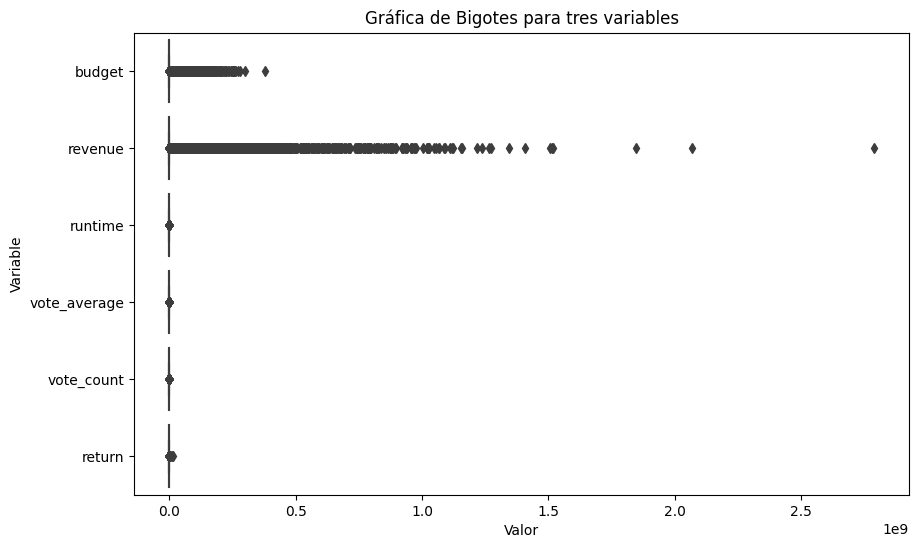

In [80]:
### Graficando las Variables 
variables = ['budget','revenue','runtime','vote_average','vote_count','return']

# Crear la gráfica de bigotes para las tres variables
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df_movies[variables], orient='h', showfliers=True)  # orient='h' para gráfica horizontal
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Variable')  # Etiqueta del eje y
plt.title('Gráfica de Bigotes para tres variables')  # Título de la gráfica
plt.show()

EStan totalmente desproporcionados. Sin embargo, se puede notar la gran cantidad de valores atípicos de la columna 'revenue'. Y es normal, ya esta variable hace referencia a los ingresos por pelícilas.

In [81]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4488 non-null   object        
 1   budget                 45376 non-null  float64       
 2   genres                 45376 non-null  object        
 3   id                     45376 non-null  object        
 4   original_language      45376 non-null  object        
 5   overview               44435 non-null  object        
 6   popularity             45376 non-null  object        
 7   production_companies   45376 non-null  object        
 8   production_countries   45376 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45376 non-null  float64       
 11  runtime                45376 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  status

In [82]:
df_movies['popularity']

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45460     5.683753
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45376, dtype: object

Podemos observar que la columna 'popularity' esta definida como objeto, pero es de tipo númerico.  

### 1.3.3) Escalado / Normalizado

1.3.3.1) Visualizando Registros Duplicados

In [83]:
### Total de Registros duplicados en: "df_movies"
print("Total de Registros Duplicados en: 'df_movies' = ", df_movies[df_movies['id'].duplicated()]['id'].count())

### Total de Registros duplicados en: "df_credits"
print("Total de Registros Duplicados en: 'df_credits' = ", df_credits[df_credits['id'].duplicated()]['id'].count())

Total de Registros Duplicados en: 'df_movies' =  30
Total de Registros Duplicados en: 'df_credits' =  44


In [84]:
### Visualizando y validando los datos de cada registros duplicados de df_credits; ordenados por el codigo de la película:
DataSets = 'df_movies'
print(f"Visualización del Dataset: {DataSets}: \n\n, {df_movies[df_movies.duplicated(subset=['id'], keep=False)].sort_values(by=['id'])}")

Visualización del Dataset: df_movies: 

,                                    belongs_to_collection      budget  \
676                                                  NaN         0.0   
1465                                                 NaN         0.0   
44821  {'id': 34055, 'name': 'Pokémon Collection', 'p...  16000000.0   
4114   {'id': 34055, 'name': 'Pokémon Collection', 'p...  16000000.0   
5710                                                 NaN         0.0   
20899                                                NaN         0.0   
23534                                                NaN   3512454.0   
4356                                                 NaN   3512454.0   
24844                                                NaN         0.0   
14012                                                NaN         0.0   
21165                                                NaN         0.0   
19890                                                NaN         0.0   
5535   {'id': 34055, '

In [85]:
### Visualizando y validando los datos de cada registros duplicados de df_credits; ordenados por el codigo de la película:
DataSets = 'df_credits'
print(f"Visualización del Dataset: {DataSets}: \n\n, {df_credits[df_credits.duplicated(subset=['id'], keep=False)].sort_values(by=['id'])}")

Visualización del Dataset: df_credits: 

,                                                     cast  \
25885  [{'cast_id': 12, 'character': 'The Creature', ...   
25950  [{'cast_id': 12, 'character': 'The Creature', ...   
33838  [{'cast_id': 15, 'character': 'Chuck Barris', ...   
5865   [{'cast_id': 15, 'character': 'Chuck Barris', ...   
9165   [{'cast_id': 11, 'character': 'Jef Costello', ...   
...                                                  ...   
25887  [{'cast_id': 7, 'character': 'Hollander', 'cre...   
24163  [{'cast_id': 2, 'character': 'Ebba', 'credit_i...   
45275  [{'cast_id': 2, 'character': 'Ebba', 'credit_i...   
33196  [{'cast_id': 1, 'character': 'Jenjira', 'credi...   
40051  [{'cast_id': 1, 'character': 'Jenjira', 'credi...   

                                                    crew      id  \
25885  [{'credit_id': '52fe4380c3a36847f80590dd', 'de...    3057   
25950  [{'credit_id': '52fe4380c3a36847f80590dd', 'de...    3057   
33838  [{'credit_id': '52fe43e2c

1.3.3.2) Eliminando los Registros Duplicados

In [86]:
### Eliminando los valores duplicados en df_movies
df_movies.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_movies[df_movies['id'].duplicated()].value_counts().sum()

### Eliminando los valores duplicados en df_credits
df_credits.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_credits[df_credits['id'].duplicated()].value_counts().sum()

0

Validando que se eliminaron los registros duplicados

In [87]:
### Total de Registros duplicados en: "df_movies"
print("Total de Registros Duplicados en: 'df_movies' = ", df_movies[df_movies['id'].duplicated()]['id'].count())

### Total de Registros duplicados en: "df_credits"
print("Total de Registros Duplicados en: 'df_credits' = ", df_credits[df_credits['id'].duplicated()]['id'].count())

Total de Registros Duplicados en: 'df_movies' =  0
Total de Registros Duplicados en: 'df_credits' =  0


1.3.3.3) Normalizando la columna 'popularity', ya que esta definida como objeto y en realidad es númerica.

In [88]:
### La columna 'popularity' esta defenida como objeto, pero en realidad es numerica. Se procede a convertirla a númerica.

print("Tipo de variable antes del cambio: ",df_movies['popularity'].dtype)
df_movies['popularity'] = pd.to_numeric(df_movies['popularity'], errors='coerce')
print("Tipo de variable despúes del cambio: ",df_movies['popularity'].dtype)

Tipo de variable antes del cambio:  object
Tipo de variable despúes del cambio:  float64


In [89]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4485 non-null   object        
 1   budget                 45346 non-null  float64       
 2   genres                 45346 non-null  object        
 3   id                     45346 non-null  object        
 4   original_language      45346 non-null  object        
 5   overview               44405 non-null  object        
 6   popularity             45346 non-null  float64       
 7   production_companies   45346 non-null  object        
 8   production_countries   45346 non-null  object        
 9   release_date           45346 non-null  datetime64[ns]
 10  revenue                45346 non-null  float64       
 11  runtime                45346 non-null  float64       
 12  spoken_languages       45346 non-null  object        
 13  status

### 1.3.4) Codificación de Variables

### 1.3.5) Selección de Atributos

1.3.5.1) Selección de 3 Actores por Películas

In [90]:
df_credits.head(2)

,cast,crew,id,cast_name,crew_job,crew_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...","Director,Screenplay,Screenplay,Screenplay,Scre...","John Lasseter,Joss Whedon,Andrew Stanton,Joel ..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...","Executive Producer,Screenplay,Original Music C...","Larry J. Franco,Jonathan Hensleigh,James Horne..."


In [91]:
### Seleccionando los atributos de la columna 'cast_name' del datasets 'df_credits'
df_credits['cast_name']

0        Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...
1        Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...
2        Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...
3        Whitney Houston,Angela Bassett,Loretta Devine,...
4        Steve Martin,Diane Keaton,Martin Short,Kimberl...
                               ...                        
45471              Leila Hatami,Kourosh Tahami,Elham Korda
45472    Angel Aquino,Perry Dizon,Hazel Orencio,Joel To...
45473    Erika Eleniak,Adam Baldwin,Julie du Page,James...
45474    Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlo...
45475                                                     
Name: cast_name, Length: 45432, dtype: object

Como ya se había mencionado anteriormente, la columna 'cast_name', contiene los nombres de los actores ordenados desde el protagonista, primer actor, segundo actor, tercer actor y así sucesivamente. 

In [92]:
### Cantidad de Actores por Películas

longDeCadaCampo = df_credits['cast_name'].str.split(',').apply(len) # Se hace una division de la cadena 
                                                                    # y se obtienela longitud o tamaño de actores por películas 
print("Cantidad de Actores por Películas\n", longDeCadaCampo[longDeCadaCampo != 3])

Cantidad de Actores por Películas
 0        13
1        26
2         7
3        10
4        12
         ..
45470     5
45472    11
45473    15
45474     5
45475     1
Name: cast_name, Length: 44300, dtype: int64


Se procede a crear tres columnas de actores: Protagonista, Actor1 y Actor2. ( N = 3 = Los 3 primeros actores)

In [93]:
### Realizando la Separacion de los Actores de las Películas

N = 3  # Número de actores a seleccionar de cada película.

# Función para obtener una lista de nombres y completar con "No Hay" si es necesario
def get_names(row):
    names = row.split(',')
    if len(names) >= 1:
        Protagonist = names[0]
    else:
        Protagonist = np.nan
    if len(names) >= 2:
        Actor1 = names[1]
    else:
        Actor1 = np.nan
    if len(names) >= 3:
        Actor2 = names[2]
    else:
        Actor2 = np.nan
    return Protagonist, Actor1, Actor2

# Dividir la columna nombres_personas y obtener nuevas columnas
df_credits[['Protagonista', 'Actor1', 'Actor2']] = pd.DataFrame(df_credits['cast_name'].apply(get_names).tolist())

# Eliminar la columna original nombres_personas si no la necesitas
df_credits.drop(columns=['cast_name'], inplace=True)

# Mostrar el DataFrame resultante
df_credits

,cast,crew,id,crew_job,crew_name,Protagonista,Actor1,Actor2
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"Director,Screenplay,Screenplay,Screenplay,Scre...","John Lasseter,Joss Whedon,Andrew Stanton,Joel ...",Tom Hanks,Tim Allen,Don Rickles
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"Executive Producer,Screenplay,Original Music C...","Larry J. Franco,Jonathan Hensleigh,James Horne...",Robin Williams,Jonathan Hyde,Kirsten Dunst
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"Director,Characters,Writer,Sound Recordist","Howard Deutch,Mark Steven Johnson,Mark Steven ...",Walter Matthau,Jack Lemmon,Ann-Margret
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"Director,Screenplay,Producer,Producer,Producer...","Forest Whitaker,Ronald Bass,Ronald Bass,Ezra S...",Whitney Houston,Angela Bassett,Loretta Devine
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"Original Music Composer,Director of Photograph...","Alan Silvestri,Elliot Davis,Nancy Meyers,Nancy...",Steve Martin,Diane Keaton,Martin Short
...,...,...,...,...,...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,"Director,Producer,Camera Supervisor,Script,Edi...","Hamid Nematollah,Hamid Nematollah,Farshad Moha...",NaN,NaN,NaN
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,"Director,Writer,Production Design,Music,Editor...","Lav Diaz,Lav Diaz,Dante Perez,Lav Diaz,Lav Dia...",NaN,NaN,NaN
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,"Director,Screenplay,Screenplay,Original Music ...","Mark L. Lester,C. Courtney Joyner,Jeffrey Gold...",NaN,NaN,NaN
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,"Director,Producer","Yakov Protazanov,Joseph N. Ermolieff",NaN,NaN,NaN


In [94]:
### Visualizando Valores Nulos en 'df_credits'
df_credits.isna().sum()

cast               0
crew               0
id                 0
crew_job           0
crew_name          0
Protagonista      44
Actor1          3784
Actor2          4692
dtype: int64

Aparecieron valores nulos en las columnas de Protagonista, Actor1 y Actor2, despúes de separarlos en columnas; los cuales son significativos para el proyecto, ya que la Recomendación de Películas estará basada entre otras, con estas tres variables. Por tal razón, se procede a eliminar estos registros con NaN.

In [95]:
### Visualizando Valores Nulos en 'df_credits'
df_credits.isna().sum()

cast               0
crew               0
id                 0
crew_job           0
crew_name          0
Protagonista      44
Actor1          3784
Actor2          4692
dtype: int64

In [96]:
### Se procede a eliminar los valores nulos de estas tres columnsa ya que serán utilizadas en la recomendación.
df_credits.dropna(subset=['Protagonista', 'Actor1', 'Actor2'], inplace=True)

### Visualizando Valores Nulos en 'df_credits'
df_credits.isna().sum()

cast            0
crew            0
id              0
crew_job        0
crew_name       0
Protagonista    0
Actor1          0
Actor2          0
dtype: int64

### 1.3.6) Ingeníeria de Features

1.3.6.1) Creación de una columna solo con el nombre de Director de la Película.

In [97]:
df_credits[['crew_job', 'crew_name']]

,crew_job,crew_name
0,"Director,Screenplay,Screenplay,Screenplay,Scre...","John Lasseter,Joss Whedon,Andrew Stanton,Joel ..."
1,"Executive Producer,Screenplay,Original Music C...","Larry J. Franco,Jonathan Hensleigh,James Horne..."
2,"Director,Characters,Writer,Sound Recordist","Howard Deutch,Mark Steven Johnson,Mark Steven ..."
3,"Director,Screenplay,Producer,Producer,Producer...","Forest Whitaker,Ronald Bass,Ronald Bass,Ezra S..."
4,"Original Music Composer,Director of Photograph...","Alan Silvestri,Elliot Davis,Nancy Meyers,Nancy..."
...,...,...
45426,Director,Georges Monca
45427,"Writer,Director,Writer","Scott Bindley,Jonathan A. Rosenbaum,Adrian Vina"
45428,"Director,Writer","Barbara Hammer,Barbara Hammer"
45429,"Director,Camera Operator","Louis Lumière,Louis Lumière"


Se puede observar que el primer nombre de la columna 'crew_job' representa al Director de la Peliículas. <Br>
Los otros nombres se correspondes a cada uno de los otros roles existentes.

Se procede a crear una sola columna con el nombre del Director.

In [98]:
# Crear una nueva columna 'Director' con los nombres de los directores
df_credits['Director'] = df_credits['crew_name'].str.split(',').str[0]

### Eliminando columnas de 'crew_job' y 'crew_name'
### Se procede a eliminar las 2 columnas anidadas ya que no la vamos a utilizar mas:
df_credits.drop(columns=['crew_job', 'crew_name'], inplace=True)
df_credits

,cast,crew,id,Protagonista,Actor1,Actor2,Director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,Tom Hanks,Tim Allen,Don Rickles,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Larry J. Franco
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Walter Matthau,Jack Lemmon,Ann-Margret,Howard Deutch
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Whitney Houston,Angela Bassett,Loretta Devine,Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Steve Martin,Diane Keaton,Martin Short,Alan Silvestri
...,...,...,...,...,...,...,...
45426,"[{'cast_id': 1, 'character': 'Rigadin', 'credi...","[{'credit_id': '53c71e870e0a267ff7002e99', 'de...",282308,Patrick Bergin,Uma Thurman,David Morrissey,Georges Monca
45427,"[{'cast_id': 0, 'character': 'Detective Simmon...","[{'credit_id': '593ba0c29251410593009be3', 'de...",461297,Leila Hatami,Kourosh Tahami,Elham Korda,Scott Bindley
45428,"[{'cast_id': 1, 'character': 'Woman Making Lov...","[{'credit_id': '531f61c3c3a3685c3700a18d', 'de...",258907,Angel Aquino,Perry Dizon,Hazel Orencio,Barbara Hammer
45429,[],"[{'credit_id': '55a6d0629251411e06000459', 'de...",127762,Erika Eleniak,Adam Baldwin,Julie du Page,Louis Lumière


Validando los Cambios realizados

In [99]:
### Total de Registros duplicados en: "df_credits"
print("Total Registros Duplicados de 'df_credits' = ",df_credits[df_credits['id'].duplicated()]['id'].count())

### Total de Registros duplicados en: df_movies
print("Total Registros Duplicados de 'df_movies' = ", df_movies[df_movies['id'].duplicated()]['id'].count(),"\n")

### Dimensiones de "df_credits"
print("Dimensiones del Datasets de 'df_credits' = ", df_credits.shape)

### Dimensiones de "df_movies"
print("Dimensiones del Datasets de 'df_movies' = ", df_movies.shape,"\n")
      
### Columnas de "df_credits"
print("Columnas de 'df_credits' = ", df_credits.columns,"\n")

### Columnas de "df_movies"
print("Columnas de 'df_movies' = ", df_movies.columns)     
      

Total Registros Duplicados de 'df_credits' =  0
Total Registros Duplicados de 'df_movies' =  0 

Dimensiones del Datasets de 'df_credits' =  (40740, 7)
Dimensiones del Datasets de 'df_movies' =  (45346, 24) 

Columnas de 'df_credits' =  Index(['cast', 'crew', 'id', 'Protagonista', 'Actor1', 'Actor2', 'Director'], dtype='object') 

Columnas de 'df_movies' =  Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'Franquicia', 'Generos', 'Productores', 'Paises', 'IdiomasH', 'Anio',
       'return'],
      dtype='object')


1.3.6.2) Eliminación de los Registros Duplicados por el Codigo de la Película de los Datasets df_credits y 'df_movies'.

In [100]:
### Eliminando los valores duplicados en df_credits
df_credits.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_credits[df_credits['id'].duplicated()].value_counts().sum()

### Eliminando los valores duplicados en df_movies
df_movies.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_movies[df_movies['id'].duplicated()].value_counts().sum()

0

In [101]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4485 non-null   object        
 1   budget                 45346 non-null  float64       
 2   genres                 45346 non-null  object        
 3   id                     45346 non-null  object        
 4   original_language      45346 non-null  object        
 5   overview               44405 non-null  object        
 6   popularity             45346 non-null  float64       
 7   production_companies   45346 non-null  object        
 8   production_countries   45346 non-null  object        
 9   release_date           45346 non-null  datetime64[ns]
 10  revenue                45346 non-null  float64       
 11  runtime                45346 non-null  float64       
 12  spoken_languages       45346 non-null  object        
 13  status

In [102]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40740 entries, 0 to 45430
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cast          40740 non-null  object
 1   crew          40740 non-null  object
 2   id            40740 non-null  int64 
 3   Protagonista  40740 non-null  object
 4   Actor1        40740 non-null  object
 5   Actor2        40740 non-null  object
 6   Director      40740 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.5+ MB


1.3.6.3) Unión de ambos Datasets df_credits y 'df_movies', para realizar mejor manipulacion de las variables.

Antes de realizar la unión de los dos procederemos a eliminar las columnas desanidadas

1) Eliminando columnas en el DataSets de 'df_movies'

In [103]:
df_movies.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'Franquicia', 'Generos', 'Productores', 'Paises', 'IdiomasH', 'Anio',
       'return'],
      dtype='object')

In [104]:
### Se procede a eliminar las 5 columnas desanidadas y la columna 'release_date':
df_movies.drop(columns=['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'release_date' ], inplace=True)

df_movies.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count',
       'Franquicia', 'Generos', 'Productores', 'Paises', 'IdiomasH', 'Anio',
       'return'],
      dtype='object')

2) Eliminando columnas en el DataSets de 'df_credits'

In [105]:
df_credits.columns

Index(['cast', 'crew', 'id', 'Protagonista', 'Actor1', 'Actor2', 'Director'], dtype='object')

In [106]:
### Se procede a eliminar las 5 columnas desanidadas y la columna 'release_date':
df_credits.drop(columns=['cast', 'crew'], inplace=True)

df_credits.columns

Index(['id', 'Protagonista', 'Actor1', 'Actor2', 'Director'], dtype='object')

Validando Informacion de Nulos y tipos de variables ante de unir los dos datasets

In [107]:
df_movies.isna().sum()

budget                 0
id                     0
original_language      0
overview             941
popularity             0
revenue                0
runtime                0
status                 0
title                  0
vote_average           0
vote_count             0
Franquicia             0
Generos                0
Productores            0
Paises                 0
IdiomasH               0
Anio                   0
return                 0
dtype: int64

In [108]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45346 non-null  float64
 1   id                 45346 non-null  object 
 2   original_language  45346 non-null  object 
 3   overview           44405 non-null  object 
 4   popularity         45346 non-null  float64
 5   revenue            45346 non-null  float64
 6   runtime            45346 non-null  float64
 7   status             45346 non-null  object 
 8   title              45346 non-null  object 
 9   vote_average       45346 non-null  float64
 10  vote_count         45346 non-null  float64
 11  Franquicia         45346 non-null  object 
 12  Generos            45346 non-null  object 
 13  Productores        45346 non-null  object 
 14  Paises             45346 non-null  object 
 15  IdiomasH           45346 non-null  object 
 16  Anio               45346 no

In [109]:
df_credits.isna().sum()

id              0
Protagonista    0
Actor1          0
Actor2          0
Director        0
dtype: int64

In [110]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40740 entries, 0 to 45430
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            40740 non-null  int64 
 1   Protagonista  40740 non-null  object
 2   Actor1        40740 non-null  object
 3   Actor2        40740 non-null  object
 4   Director      40740 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


Se puede observar el codigo de la pelicula son de diferentes tipos en los Datasets. <Br>Se procede tambien a convertirlos en númerico para realizar la unión de ambos Datasets:

In [111]:
### Se resetean los indices de los dos Dataset, dado las modificaciones que se han realizado.
df_movies.reset_index(drop=True, inplace=True)
df_credits.reset_index(drop=True, inplace=True)

### Se lleva en ambas columnas el tipo de codigo de la película 'id' a ent64 para facilitar el merge:
df_credits['id'] = df_credits['id'].astype('int64')
df_movies['id'] = df_movies['id'].astype('int64')

### Se procede a realizar el merge entre los dos dataframes:
df_movies_JOIN = pd.merge(df_movies, df_credits, on='id')
df_movies_JOIN.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count',
       'Franquicia', 'Generos', 'Productores', 'Paises', 'IdiomasH', 'Anio',
       'return', 'Protagonista', 'Actor1', 'Actor2', 'Director'],
      dtype='object')

In [112]:
### Validando Valores Nulos
df_movies_JOIN.isna().sum()

budget                 0
id                     0
original_language      0
overview             815
popularity             0
revenue                0
runtime                0
status                 0
title                  0
vote_average           0
vote_count             0
Franquicia             0
Generos                0
Productores            0
Paises                 0
IdiomasH               0
Anio                   0
return                 0
Protagonista           0
Actor1                 0
Actor2                 0
Director               0
dtype: int64

# 2) Analisís Exploratorios de los Datos (EDA)

In [145]:
df_movies_JOIN.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count',
       'Franquicia', 'Generos', 'Productores', 'Paises', 'IdiomasH', 'Anio',
       'return', 'Protagonista', 'Actor1', 'Actor2', 'Director'],
      dtype='object')

### 1) Analizando la Columna 'budget'

In [146]:
df_movies_JOIN['budget']

0        30000000.0
1        65000000.0
2               0.0
3        16000000.0
4               0.0
            ...    
40661           0.0
40662           0.0
40663           0.0
40664           0.0
40665           0.0
Name: budget, Length: 40666, dtype: float64

In [155]:
### Información Detallada de la Columna: 'original_language'
Columna = 'budget'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies_JOIN.shape[0]}")
print(f"Total Valores Nulos: {df_movies_JOIN[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies_JOIN[Columna].isna().sum()/df_movies_JOIN.shape[0])*100,3)} %")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'budget'
Total Registros: 40666
Total Valores Nulos: 0
Porcentaje Valores Nulos: 0.0 %


count    4.534600e+04
mean     4.232580e+06
std      1.744373e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

La variable 'budget' representa al presupuesto de la película. Indiferente del valor de esta métrica podria gustarle o no a una persona. Por lo tanto, no se tomará en cuenta para el presente proyecto.

### 2) Analizando la Columna 'original_language'

In [163]:
df_movies_JOIN['original_language']

0        en
1        en
2        en
3        en
4        en
         ..
40661    en
40662    en
40663    en
40664    fr
40665    en
Name: original_language, Length: 40666, dtype: object

La variable 'original_language' es el idioma original en la cual se grabo la pelicula.

In [153]:
### Información Detallada de la Columna: 'original_language'
Columna = 'original_language'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies_JOIN.shape[0]}")
print(f"Total Valores Nulos: {df_movies_JOIN[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies_JOIN[Columna].isna().sum()/df_movies_JOIN.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies_JOIN[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %    Atributo: {df_movies[Columna].describe()[2]}")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'original_language'
Total Registros: 40666
Total Valores Nulos: 0
Porcentaje Valores Nulos: 0.0 %
Frecuencia del Valor que mas se repite: 29073     Porcentaje= 70.999 %    Atributo: en


count     45346
unique       89
top          en
freq      32195
Name: original_language, dtype: object

Practicamente, de cada 10 películas 7 son grabadas en Ingles. Lo que indica claramente que no es una variable relevante para éste estudio.

### 3) Analizando la Columna 'overview'

In [164]:
df_movies_JOIN['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
40661    After visiting the first Cubist exposition in ...
40662    In this family-friendly action reboot of the 1...
40663    Born in Los Angeles but a New Yorker by choice...
40664    Several little boys run along a pier, then jum...
40665    Scheherezade puts herself in danger to save Su...
Name: overview, Length: 40666, dtype: object

La variable 'overview' por contener una descripción de cada película se hace muy relevante tomarla en cuenta para realizar la recomendación. <Br>Una de las formas de utilizarla seria tokenizando dicha variable para extraer las palabras claves y, de ésta manera poder utilizarla efectivamente en la recomendación. <Br> En el presente proyecto no se tomará para la recomendación.

### 4) Analizando la Columna 'popularity'

In [165]:
df_movies_JOIN['popularity']

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
40661     0.003732
40662     1.248353
40663     0.331254
40664     0.429666
40665     2.266456
Name: popularity, Length: 40666, dtype: float64

In [166]:
### Información Detallada de la Columna: 'popularity'
Columna = 'popularity'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies_JOIN.shape[0]}")
print(f"Total Valores Nulos: {df_movies_JOIN[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies_JOIN[Columna].isna().sum()/df_movies_JOIN.shape[0])*100,3)} %")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'popularity'
Total Registros: 40666
Total Valores Nulos: 0
Porcentaje Valores Nulos: 0.0 %


count    45346.000000
mean         2.926188
std          6.010970
min          0.000000
25%          0.388732
50%          1.130176
75%          3.689337
max        547.488298
Name: popularity, dtype: float64

Se puede observar que el promedio de los puntajes de Popularidad es aproximadamente de 3, con una desviación estandart de 6. 

El puntaje de popularidad asignado por TMDB es una medida calculada internamente por TMDB y se basa en varios factores, como las interacciones de los usuarios con la película, la cantidad de veces que la película ha sido vista, la cantidad de reseñas y calificaciones que ha recibido, y posiblemente otros datos relacionados con su visibilidad y promoción en la plataforma. Dicho puntaje es directamente proporcional a su popularidad.<Br> Aunque es una medida interna de TMDB, dicha metrica está midiendo popularidad. <Br> Por tal razón, será incluida en nuestra recomendación.

### 5) Analizando la Columna 'revenue'

In [168]:
df_movies_JOIN['revenue']

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
40661            0.0
40662            0.0
40663            0.0
40664            0.0
40665            0.0
Name: revenue, Length: 40666, dtype: float64

In [169]:
### Información Detallada de la Columna: 'revenue'
Columna = 'revenue'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies_JOIN.shape[0]}")
print(f"Total Valores Nulos: {df_movies_JOIN[Columna].isna().sum()}")
print(f"Porcentaje Valores Nulos: {round((df_movies_JOIN[Columna].isna().sum()/df_movies_JOIN.shape[0])*100,3)} %")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'revenue'
Total Registros: 40666
Total Valores Nulos: 0
Porcentaje Valores Nulos: 0.0 %


count    4.534600e+04
mean     1.123366e+07
std      6.440990e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

Creo que si

### 6) Analizando la Columna 'revenue'

### 7) Analizando la Columna 'revenue'

### 8) Analizando la Columna 'revenue'

### 9) Analizando la Columna 'revenue'

### 10) Analizando la Columna 'revenue'

### 11) Analizando la Columna 'revenue'

### 12) Analizando la Columna 'revenue'

### 13) Analizando la Columna 'revenue'

### 14) Analizando la Columna 'revenue'

### Guardando el DataSets resultante para luego subirlo a GitHub.

In [ ]:
### Realizando la carga en disco para subir el nuevo DataSets de Datos: df_movies_JOIN
df_movies_JOIN.to_csv('DataSets/df_movies_JOIN.csv', sep=',')

### Cargando el nuevo Dataset resultante para realizar pruebas locales

Cuando cargo el nuevo Dataset aparecen nuevamente los valores nulos que ya habia eliminado. Realice varias pruebas y no logré cargar dicho DataSets sin valores nulos. Por tal razón, luego de cargarlo en el MAIN, se procede a reemplazar por espacios vacíossus correspondientes valores nulos.

In [ ]:
### Una vez cargado el Dataset hay que eliminar nuevamente los valores nulos ya que los vuelve a cargar al leer el archivo para subirlo a Render.
### Realice varias pruebas y no logré subir nuevamente sin valores nulos.
# Columnas que se traen nuevamente los valores nulos que ya habian sido eliminados.

### CArgando el nuevo Dataset resultante para realizar pruebas locales
df_movies_JOIN222 = pd.read_csv('df_movies_JOIN.csv', sep=',')
df_movies_JOIN222.isna().sum()

columns_to_fillna = ['Franquicia', 'Generos', 'Productores', 'Paises', 'IdiomasH', 'Director']

# Reemplazar los valores nulos en las columnas con un espacio en blanco y convertir a tipo objeto
df_movies_JOIN222[columns_to_fillna] = df_movies_JOIN222[columns_to_fillna].fillna(' ').astype(str)


### 

# 3) Funciones APis

### 

## 3.1) Funciones Requeridas

### Función Nro. 1 <Br>
'''Ingresas el idioma, retornando la cantidad de peliculas producidas en el mismo'''

In [275]:
### FUNCION Nro. 1
#@app.get('/peliculas_idioma/{idioma}')
def peliculas_idioma(idioma:str):
    '''Ingresas el idioma, retornando la cantidad de peliculas producidas en el mismo'''
    try:
        idioma = idioma.lower()
        mask = df_movies_JOIN[df_movies_JOIN['original_language'].str.lower() == idioma]
        
        if mask.empty:
            {'Error': 'Idioma no encontrado. Intente de nuevo...!!! '}    # Si la mascara esta vacía, entonces no encontro ningun idioma.
        
        respuesta = mask.shape[0]   # Si la mascara no esta vacís, entonces registra la cantidad de registros o filas = Total de Películas.         

        return {'idioma':idioma, 'cantidad':respuesta}   # Retorna el resultado

    except Exception as e:
        return {'error': f'Ocurrió un error: {e}'}

### Probando la funcón::
Idioma = 'es'
Respuesta = peliculas_idioma(Idioma)
print(Respuesta) 

{'idioma': 'es', 'cantidad': 883}


### Función Nro. 2 <Br>
'''Ingresas la pelicula, retornando la duracion y el año'''

In [282]:
### FUNCION Nro. 2
#@app.get('/peliculas_duracion/{pelicula}')   
def peliculas_duracion(pelicula:str):
    '''Ingresas la pelicula, retornando la duracion y el año'''
    try:
        pelicula = pelicula.lower()
        datos_pelicula = df_movies_JOIN[df_movies_JOIN['title'].str.lower() == pelicula]  # Si no lo encuentra se convierte en un Dataframe vacío
        
        if datos_pelicula.empty:
            return {'error': 'Película no encontrada en el DataFrame.'}
        
        duracion = int(datos_pelicula['runtime'].iloc[0])   # Extrae la primera fila de la columna 'runtime' = Duración
        anio = int(datos_pelicula['Anio'].iloc[0])          # Extrae la primera fila de la columna 'Anio' = Anio

        return {'pelicula':pelicula, 'duracion':duracion, 'anio':anio}

    except Exception as e:
        return {'Error': f'Por favor, corrija este error: {e}'}

### Llamando a la función:
Pelicula = 'toy story'
Respuesta = peliculas_duracion(Pelicula)
print(Respuesta)  

{'pelicula': 'toy story', 'duracion': 81, 'anio': 1995}


### Función Nro. 3 <Br>
'''Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio'''

In [300]:
### FUNCION Nro. 3
#@app.get('/franquicia/{franquicia}')
def franquicia(franquicia:str):
    '''Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio'''
    try:
        franquicia = franquicia.lower()
        datos_franquicia = df_movies_JOIN[df_movies_JOIN['Franquicia'].str.lower() == franquicia]
        
        if datos_franquicia.empty:
            return {'error': 'Franquicia no encontrada en el DataFrame.'}
        
        cantidad = int(datos_franquicia['Franquicia'].shape[0])
        ganancia_total = float(datos_franquicia['revenue'].sum())
        
        if cantidad == 0:
            ganancia_promedio = 0
        else:
            ganancia_promedio = float(ganancia_total/cantidad)
        
        return {'franquicia':franquicia, 'cantidad':cantidad, 'ganancia_total':ganancia_total, 'ganancia_promedio':ganancia_promedio}
        
    except Exception as e:
        return {'Error': f'Por favor, corrija este error: {e}'}
    

### Llamando a la función:
franquicia1 = 'Toy Story Collection1'
Respuesta = franquicia(franquicia1)
print(Respuesta) 

{'error': 'Franquicia no encontrada en el DataFrame.'}


### Función Nro. 4 <Br>
'''Ingresas el pais, retornando la cantidad de peliculas producidas en el mismo'''

In [285]:
df_movies_JOIN.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count',
       'Franquicia', 'Generos', 'Productores', 'Paises', 'IdiomasH', 'Anio',
       'return', 'Protagonista', 'Actor1', 'Actor2', 'Director'],
      dtype='object')

In [298]:
### FUNCION Nro. 4 
#@app.get('/peliculas_pais/{pais}')
def peliculas_pais(pais:str):
    '''Ingresas el pais, retornando la cantidad de peliculas producidas en el mismo'''
    try:
        pais = pais.lower()
        datos_pais = df_movies_JOIN[df_movies_JOIN['Paises'].str.lower() == pais]
        
        if datos_pais.empty:
            return {'error': 'País no encontrado en el DataFrame.'}
        
        cantidad = int(datos_pais['Paises'].shape[0]) 
        
        return {'pais':pais, 'cantidad':cantidad}  
  
    except Exception as e:
        return {'Error': f'Por favor, corrija este error: {e}'} 
   
### Llamando a la función:
Pais = 'Spain'
Respuesta = peliculas_pais(Pais)
print(Respuesta) 

{'pais': 'spain', 'cantidad': 357}


### Función Nro. 5 <Br>
'''Ingresas la productora, entregandote el revenue total y la cantidad de peliculas que realizo '''

In [292]:
### FUNCION Nro. 5
#@app.get('/productoras_exitosas/{productora}')
def productoras_exitosas(productora:str):
    '''Ingresas la productora, entregandote el revenue total y la cantidad de peliculas que realizo '''
    try:
        productora = productora.lower() 
        datos_productora = df_movies_JOIN[df_movies_JOIN['Productores'].str.lower().str.contains(productora)]
        
        if datos_productora.empty:
            return {'error': 'Productora no encontrada en el DataFrame.'}
                  
        revenue_total = float(datos_productora['revenue'].sum())
        cantidad = int(datos_productora['revenue'].shape[0])
        
        return {'productora':productora, 'revenue_total': revenue_total,'cantidad':cantidad}
    
    except Exception as e:
        return {'Error': f'Por favor, corrija este error: {e}'} 
    

# Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Collection'
productora = 'Touchstone Pictures'
Respuesta = productoras_exitosas(productora)
print(Respuesta)

{'error': 'País no encontrada en el DataFrame.'}


### Función Nro. 6 <Br>
''' Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. <Br>
Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma. En formato Lista '''

''' Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. <Br>
Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma. En formato Lista '''

In [297]:
### FUNCION Nro. 6
#@app.get('/get_director/{nombre_director}')
def get_director(nombre_director:str):
    try:
        nombre_director = nombre_director.lower()
        
        datos_director = df_movies_JOIN[df_movies_JOIN['Director'].str.lower().str.contains(nombre_director)]    # #Hacemos una lista de ocurrencia de Directores en un DF temporal
      
        if datos_director.empty:
            return {'error': 'País no encontrada en el DataFrame.'}
        
        # Peliculas del Director con sus respectivas variables       
        Peliculas_del_Director = datos_director[['title', 'Anio', 'revenue', 'budget']]
        
        # Retorno del exito 
        retorno_total_director = float(Peliculas_del_Director['revenue'].sum() / Peliculas_del_Director['budget'].sum())
        
        # Convertir el DataFrame en una lista de diccionarios
        Lista_De_Dicc = Peliculas_del_Director.to_dict('records')
        
        return {'director':nombre_director, 'retorno_total_director':retorno_total_director, 'peliculas':Lista_De_Dicc}
        
    except Exception as e:
        return {'Error': f'Por favor, corrija este error: {e}'} 
   

### Llamando a la función:
NombreDelDirector = 'John lasseter'
#NombreDelDirector = 'Larry J'   # No es director######################
#NombreDelDirector = 'Joe Johnston'
Respuesta = get_director(NombreDelDirector)
print(Respuesta)  

{'director': 'john lasseter', 'retorno_total_director': 3.9856304107142857, 'peliculas': [{'title': 'Toy Story', 'Anio': 1995, 'revenue': 373554033.0, 'budget': 30000000.0}, {'title': 'The Incredibles', 'Anio': 2004, 'revenue': 631442092.0, 'budget': 92000000.0}, {'title': "Howl's Moving Castle", 'Anio': 2004, 'revenue': 234710455.0, 'budget': 24000000.0}, {'title': 'Luxo Jr.', 'Anio': 1986, 'revenue': 0.0, 'budget': 0.0}, {'title': 'Cars', 'Anio': 2006, 'revenue': 461983149.0, 'budget': 120000000.0}, {'title': 'Bolt', 'Anio': 2008, 'revenue': 309979994.0, 'budget': 150000000.0}, {'title': 'The Princess and the Frog', 'Anio': 2009, 'revenue': 267045765.0, 'budget': 105000000.0}, {'title': 'Tangled', 'Anio': 2010, 'revenue': 591794936.0, 'budget': 260000000.0}, {'title': 'Cars 2', 'Anio': 2011, 'revenue': 559852396.0, 'budget': 200000000.0}, {'title': 'The Ballad of Nessie', 'Anio': 2011, 'revenue': 0.0, 'budget': 0.0}, {'title': 'Jack-Jack Attack', 'Anio': 2004, 'revenue': 0.0, 'budget

## 3.1) Funciones de Recomendacion ML

Esta función está utilizando la Simulitud del Coseno para encontrar las películas semilares !!!

In [299]:
# ML
#@app.get('/recomendacion/{titulo}')
def recomendacion(titulo:str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    try:
        # Convertir el título ingresado por el usuario a minúsculas
        titulo = titulo.lower()
        
        # Obtener el id de la película que le gustó al usuario
        movie_id = df_movies_JOIN.loc[df_movies_JOIN['title'].str.lower() == titulo, 'id'].iloc[0]

        # Obteneiendo las características de las siguientes variables predictoras del Dataset
        genre_features = df_movies_JOIN['Generos']
        director_features = df_movies_JOIN['Director']
        protagonist_features = df_movies_JOIN['Protagonista']
        actor1_features = df_movies_JOIN['Actor1']
        actor2_features = df_movies_JOIN['Actor2']
        popularity_features = df_movies_JOIN['popularity'].fillna(0).astype(str)  # Convertir a cadena y llenar valores NaN con '0'
        anio_features = df_movies_JOIN['Anio'].fillna(0).astype(str)  # Convertir a cadena y llenar valores NaN con '0'
        revenue_features = df_movies_JOIN['revenue'].fillna(0).astype(str)  # Convertir a cadena y llenar valores NaN con '0'
        vote_average_features = df_movies_JOIN['vote_average'].fillna(0).astype(str)  # Convertir a cadena y llenar valores NaN con '0'
        vote_count_features = df_movies_JOIN['vote_count'].fillna(0).astype(str)  # Convertir a cadena y llenar valores NaN con '0'
        franquicia_features = df_movies_JOIN['Franquicia']
        
        # Concatenar todas las características
        all_features = franquicia_features + ' ' + genre_features + ' ' + director_features + ' ' + protagonist_features + ' ' + actor1_features + ' ' + actor2_features + ' ' + popularity_features + ' ' + anio_features + ' ' + revenue_features + ' ' + vote_average_features + ' ' + vote_count_features

        # Crear un objeto CountVectorizer para convertir las características en vectores
        vectorizer = CountVectorizer(analyzer='word', lowercase=True, token_pattern=r'\w+')

        # Obtener la matriz de documentos término-frecuencia (DTM) a partir de las características
        all_features_matrix = vectorizer.fit_transform(all_features)

        # Obtener las características de la película que le gustó al usuario
        movie_features = df_movies_JOIN.loc[df_movies_JOIN['id'] == movie_id, 'Franquicia'].iloc[0] + ' ' + df_movies_JOIN.loc[df_movies_JOIN['id'] == movie_id, 'Generos'].iloc[0] + ' ' + df_movies_JOIN.loc[df_movies_JOIN['id'] == movie_id, 'Director'].iloc[0] + ' ' + df_movies_JOIN.loc[df_movies_JOIN['id'] == movie_id, 'Protagonista'].iloc[0] + ' ' + df_movies_JOIN.loc[df_movies_JOIN['id'] == movie_id, 'Actor1'].iloc[0] + ' ' + df_movies_JOIN.loc[df_movies_JOIN['id'] == movie_id, 'Actor2'].iloc[0] + ' ' + popularity_features.iloc[0] + ' ' + anio_features.iloc[0] + ' ' + revenue_features.iloc[0] + ' ' + vote_average_features.iloc[0] + ' ' + vote_count_features.iloc[0]
        movie_features_matrix = vectorizer.transform([movie_features])

        # Calcular la similitud del coseno entre la película que le gustó al usuario y todas las demás películas
        similarities = cosine_similarity(movie_features_matrix, all_features_matrix)

        # Obtener los índices de las películas más similares
        similar_indices = similarities.argsort()[0][-6:-1]

        # Obtener los títulos de las películas más similares
        similar_movies = df_movies_JOIN.loc[similar_indices, 'title']
        
        similar_movies = similar_movies.tolist()

        return {'Películas Recomendadas': similar_movies}

    except IndexError:
        return {'Error': 'Película no encontrada. Intente de nuevo...!!! '}
    
    except Exception as e:
        return {'error': f'Ocurrió un error: {e}'}


titulo = 'toy story'
Recomendacion = recomendacion(titulo) 
print(Recomendacion)

{'Películas Recomendadas': ["John Pinette: I'm Starvin'!", 'Tangled Ever After', 'Institute Benjamenta, or This Dream People Call Human Life', 'Luxo Jr.', 'I Hate Mondays']}


In [ ]:
{'lista recomendada': ['Tangled Ever After', 'Frozen Fever', 'Over the Hedge', 'Jungle 2 Jungle', 'Three Little Words']}

In [ ]:
{'lista recomendada': ['Three Little Words', 'Jimmy Neutron: Boy Genius', 'Jungle 2 Jungle', 'Bad Medicine', 'Over the Hedge']}

In [140]:
df_movies_JOIN[df_movies_JOIN['title'] == 'Jimmy Neutron: Boy Genius']

,budget,id,original_language,overview,popularity,revenue,runtime,status,title,vote_average,...,Generos,Productores,Paises,IdiomasH,Anio,return,Protagonista,Actor1,Actor2,Director
4718,25000000.0,12589,en,Jimmy Neutron is a boy genius and way ahead of...,7.308162,80936232.0,83.0,Released,Jimmy Neutron: Boy Genius,5.6,...,"Action,Adventure,Animation,Comedy,Family,Fanta...","Nickelodeon Movies,Universal Cartoon Studios,P...",United States of America,English,2001,3.237449,Tim Allen,Julie Bowen,Kelly Lynch,John Debney


# Fin del Proyecto !!!

In [171]:
df_movies_JOIN.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count',
       'Franquicia', 'Generos', 'Productores', 'Paises', 'IdiomasH', 'Anio',
       'return', 'Protagonista', 'Actor1', 'Actor2', 'Director'],
      dtype='object')

### 

In [ ]:
def recomendacion(titulo:str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    try:
        # Obtener el id de la película que le gustó al usuario
        movie_id = df_movies_JOIN.loc[df_movies_JOIN['title'] == titulo, 'id'].iloc[0]

        # Resto del código...

        # Obtener los títulos de las películas más similares
        similar_indices = similarities.argsort()[0][-6:-1]

        # Obtener los títulos de las películas más similares
        similar_movies = df_movies_JOIN.loc[similar_indices, 'title']
        
        similar_movies = similar_movies.tolist()

        return {'lista recomendada': similar_movies}

    except IndexError:
        return {'error': 'La película ingresada no fue encontrada en el DataFrame.'}
    
    except Exception as e:
        return {'error': f'Ocurrió un error: {e}'}

# Llamada a la función
titulo_pelicula = "Nombre de la película"
resultado = recomendacion(titulo_pelicula)
print(resultado)


In [ ]:
def recomendacion(titulo:str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    try:
        # Convertir el título ingresado por el usuario a minúsculas
        titulo = titulo.lower()

        # Obtener el id de la película que le gustó al usuario
        movie_id = df_movies_JOIN.loc[df_movies_JOIN['title'].str.lower() == titulo, 'id'].iloc[0]

        # Resto del código...

        # Obtener los títulos de las películas más similares
        similar_indices = similarities.argsort()[0][-6:-1]

        # Obtener los títulos de las películas más similares
        similar_movies = df_movies_JOIN.loc[similar_indices, 'title']
        
        similar_movies = similar_movies.tolist()

        return {'lista recomendada': similar_movies}

    except IndexError:
        return {'error': 'La película ingresada no fue encontrada en el DataFrame.'}
    
    except Exception as e:
        return {'error': f'Ocurrió un error: {e}'}

# Llamada a la función
titulo_pelicula = "Nombre de la película"
resultado = recomendacion(titulo_pelicula)
print(resultado)


In [199]:
df_movies_JOIN['title'].head(500)

0                        Toy Story
1                          Jumanji
2                 Grumpier Old Men
3                Waiting to Exhale
4      Father of the Bride Part II
                  ...             
495             The Puppet Masters
496              Radioland Murders
497                        The Ref
498         The Remains of the Day
499                Renaissance Man
Name: title, Length: 500, dtype: object

In [201]:
df_movies.to_excel('df_movies_JOIN.xlsx')